In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import axes3d
from rerf.urerf import UnsupervisedRandomForest
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

In [22]:
# creating dataset with 2 and 3 features, respectively
centers_2D=[(30,1.5),(0,0),(-25,1)]
X_2D, true_label_2D = make_blobs(n_samples=500, 
                                 n_features=2,
                                 centers=4, 
                                 cluster_std=.5,
                                 shuffle=True, 
                                 random_state=0)
X_2D_NoNoise=X_2D
X_2D_HighNoise=X_2D+np.random.normal(0, 15, size=X_2D.shape)
X_2D_MediumNoise=X_2D+np.random.normal(0, 3, size=X_2D.shape)
X_2D_LowNoise=X_2D+np.random.normal(0, .5, size=X_2D.shape)

centers_3D=[(30,1.5,1),(0,0,0),(-25,1,2)]
X_3D, true_label_3D = make_blobs(n_samples=500, 
                                 n_features=3,
                                 centers=centers_3D, 
                                 cluster_std=0.5,
                                 shuffle=True, 
                                 random_state=0)
X_3D_NoNoise=X_3D
X_3D_HighNoise=X_3D+np.random.normal(0, 15, size=X_3D.shape)
X_3D_MediumNoise=X_3D+np.random.normal(0, 3, size=X_3D.shape)
X_3D_LowNoise=X_3D+np.random.normal(0, .5, size=X_3D.shape)

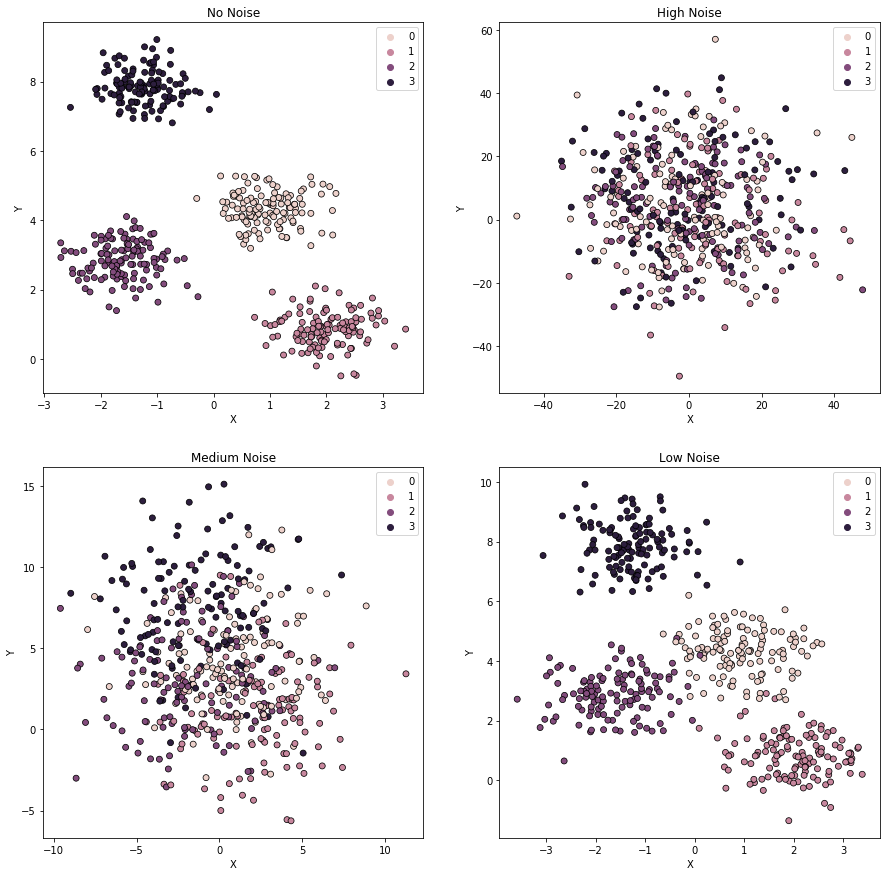

In [23]:
# plotting 2D data
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
def PlotTrue2D(x,y,z,X_2D,true_label,title):
    plt.subplot(x,y,z)
    sns.scatterplot(X_2D[:,0],X_2D[:,1],hue=true_label,edgecolor='black');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

PlotTrue2D(2,2,1,X_2D_NoNoise,true_label_2D,'No Noise')
PlotTrue2D(2,2,2,X_2D_HighNoise,true_label_2D,'High Noise')
PlotTrue2D(2,2,3,X_2D_MediumNoise,true_label_2D,'Medium Noise')
PlotTrue2D(2,2,4,X_2D_LowNoise,true_label_2D,'Low Noise')

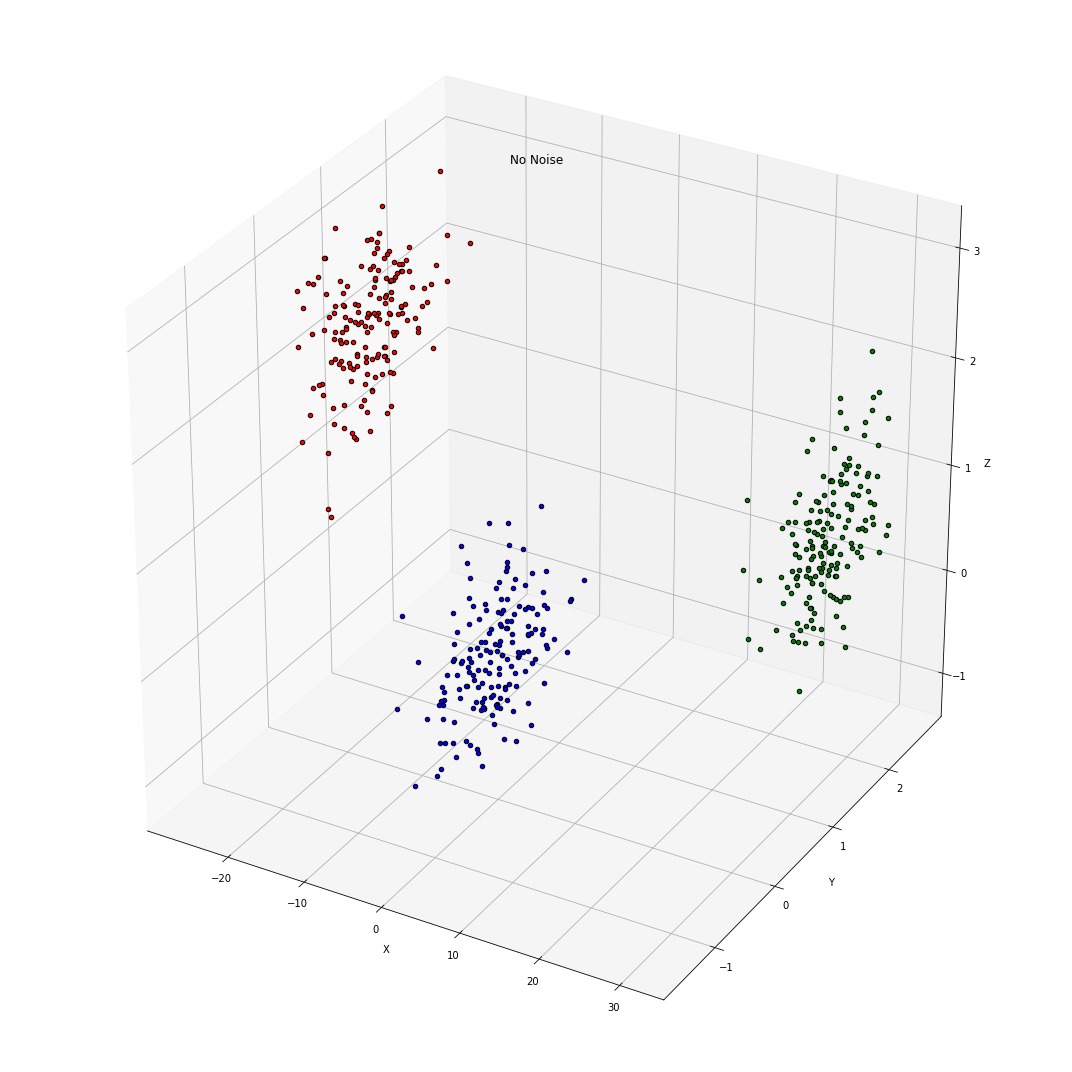

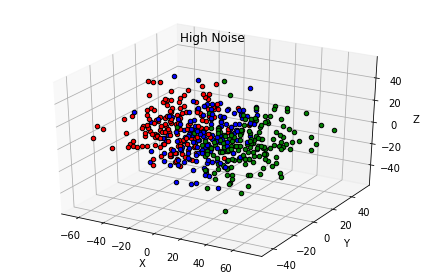

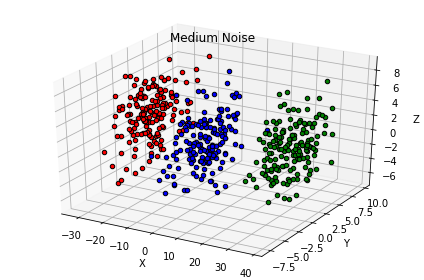

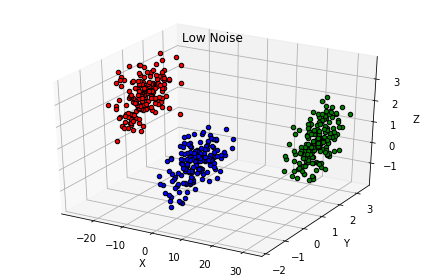

In [24]:
# plotting 3D data
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
def PlotTrueLabels(x,y,z,X_3D,true_label,title):
    plt.subplot(x,y,z)
    ax = plt.axes(projection='3d')
    colors = ['g','b','r']
    for i, col in zip(X_3D,true_label):
        ax.scatter3D(i[0],i[1],i[2], color = colors[col],edgecolor='black')
    plt.title('True labels for 3D data')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
PlotTrueLabels(2,2,1,X_3D_NoNoise,true_label_3D,'No Noise')
PlotTrueLabels(2,2,2,X_3D_HighNoise,true_label_3D,'High Noise')
PlotTrueLabels(2,2,3,X_3D_MediumNoise,true_label_3D,'Medium Noise')
PlotTrueLabels(2,2,4,X_3D_LowNoise,true_label_3D,'Low Noise')


In [25]:
def agglomerative_clustering(sd,features,centers):
    I = []
    cluster=[]
    Rand_Index_2D=[]
    
    for i in range (0,30):
        I.append(i+1)
        
    A_Agglomerative_2D = []
    cluster_A_2D = []

    for j in range(0,100):
        X_2D, true_label_2D = make_blobs(n_samples=200, 
                                     n_features=features,
                                     centers=centers_2D, 
                                     cluster_std=4,
                                     shuffle=True, 
                                     random_state=0)
        
        X_2D_Noise=X_2D+np.random.normal(0, sd, size=X_2D.shape)
        clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
        clf.fit(X_2D_Noise)
        sim_mat_2D = clf.transform()
        
        cluster_A_2D.append([])
        A_Agglomerative_2D.append([])
        
        for i in range (0,30):
            cluster_A_2D[j].append(AgglomerativeClustering(n_clusters=i+1, affinity="precomputed", linkage="average"))
            predict_labels_A_2D = cluster_A_2D[j][i].fit_predict(1-sim_mat_2D)
            A_Agglomerative_2D[j].append(adjusted_rand_score(true_label_2D, predict_labels_A_2D))
            Rand_Index_2D.append(A_Agglomerative_2D[j][i])
            cluster.append(I[i])
    
    return Rand_Index_2D,cluster

# finding rand index for 2D data 
Rand_Index_2D,cluster=agglomerative_clustering(0,2,centers_2D)
Rand_Index_2D_HighNoise,cluster_HighNoise=agglomerative_clustering(15,2,centers_2D)
Rand_Index_2D_MediumNoise,cluster_MediumNoise=agglomerative_clustering(3,2,centers_2D)
Rand_Index_2D_LowNoise,cluster_LowNoise=agglomerative_clustering(.5,2,centers_2D)  

# finding rand index for 3D data

Rand_Index_3D,cluster=agglomerative_clustering(0,3,centers_3D)
Rand_Index_3D_HighNoise,cluster_HighNoise=agglomerative_clustering(15,3,centers_3D)
Rand_Index_3D_MediumNoise,cluster_MediumNoise=agglomerative_clustering(3,3,centers_3D)
Rand_Index_3D_LowNoise,cluster_LowNoise=agglomerative_clustering(.5,3,centers_3D)  

The maximum value for ARI is 0.9123518098442996 and the number of clusters corresponding to this is 3
The maximum value for ARI is 0.45901544789344195 and the number of clusters corresponding to this is 2
The maximum value for ARI is 0.9556807101995731 and the number of clusters corresponding to this is 3
The maximum value for ARI is 0.9700038858602408 and the number of clusters corresponding to this is 3


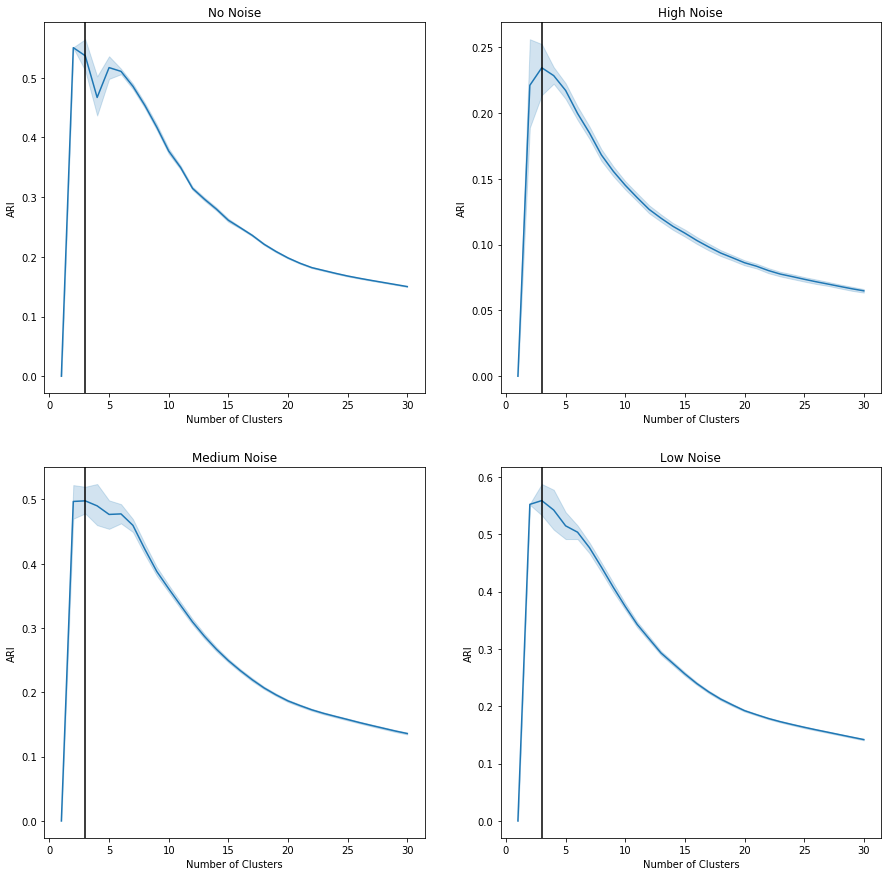

In [26]:
# plotting ARI vs number of clusters for each level of noise separately for 2D data
def Plot(x,y,z,cluster,RandIndex,title):
    plt.subplot(x,y,z)
    data={'Number of Clusters':cluster,'ARI':RandIndex}
    sns.lineplot(x='Number of Clusters',y='ARI',data=data)
    plt.xlabel('Number of Clusters')
    plt.ylabel('ARI')
    plt.axvline(x=3,color='k')
    plt.title(title)
    maxid = np.argmax(RandIndex) # The id of the peak (maximum of Rand_Index-2D)
    print('The maximum value for ARI is '+str(RandIndex[maxid])+ ' and the number of clusters corresponding to this is '+str(cluster[maxid]))
    

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
Plot(2,2,1,cluster,Rand_Index_2D,'No Noise')
Plot(2,2,2,cluster,Rand_Index_2D_HighNoise, 'High Noise')
Plot(2,2,3,cluster,Rand_Index_2D_MediumNoise, 'Medium Noise')
Plot(2,2,4,cluster,Rand_Index_2D_LowNoise, 'Low Noise')



The maximum value for ARI is 0.9700038858602408 and the number of clusters corresponding to this is 3
The maximum value for ARI is 0.44405564873245895 and the number of clusters corresponding to this is 2
The maximum value for ARI is 0.9848865697285946 and the number of clusters corresponding to this is 3
The maximum value for ARI is 0.9700038858602408 and the number of clusters corresponding to this is 3


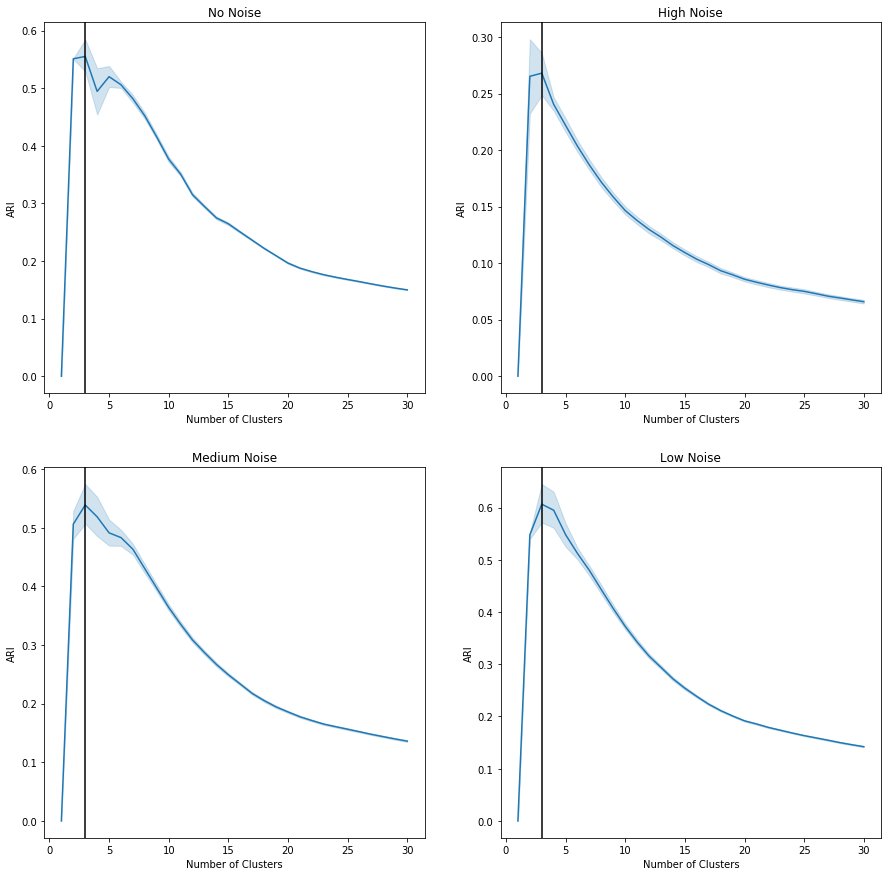

In [27]:
#plotting ari against the number of clusters for 3D data

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
Plot(2,2,1,cluster,Rand_Index_3D,'No Noise')
Plot(2,2,2,cluster,Rand_Index_3D_HighNoise, 'High Noise')
Plot(2,2,3,cluster,Rand_Index_3D_MediumNoise, 'Medium Noise')
Plot(2,2,4,cluster,Rand_Index_3D_LowNoise, 'Low Noise')

Text(0, 0.5, 'ARI')

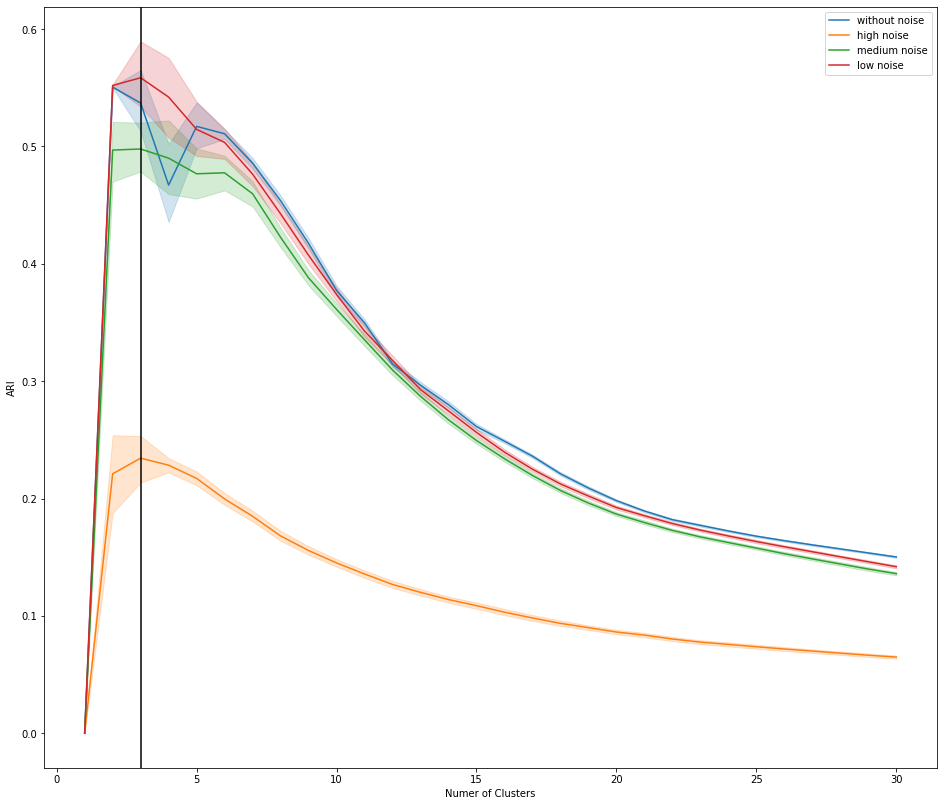

In [28]:
#combining all the plots for 2D data
Event=[]
for i in range(0,3000):
    Event.append('without noise')
for i in range(0,3000):
    Event.append('high noise')
for i in range(0,3000):
    Event.append('medium noise')
for i in range(0,3000):
    Event.append('low noise')
    
Total_ARI_2D=[]
Total_ARI_2D.extend(Rand_Index_2D)
Total_ARI_2D.extend(Rand_Index_2D_HighNoise)
Total_ARI_2D.extend(Rand_Index_2D_MediumNoise)
Total_ARI_2D.extend(Rand_Index_2D_LowNoise)

Total_Cluster_2D=[]
Total_Cluster_2D.extend(cluster)
Total_Cluster_2D.extend(cluster_HighNoise)
Total_Cluster_2D.extend(cluster_MediumNoise)
Total_Cluster_2D.extend(cluster_LowNoise)

data_2D={'Number of Clusters':Total_Cluster_2D,'ARI':Total_ARI_2D,'Event':Event}
plt.figure(figsize=(16, 14))
sns.lineplot(x='Number of Clusters',y='ARI',hue='Event',data=data_2D)
plt.axvline(x=3,color='k')
plt.xlabel('Numer of Clusters')
plt.ylabel('ARI')

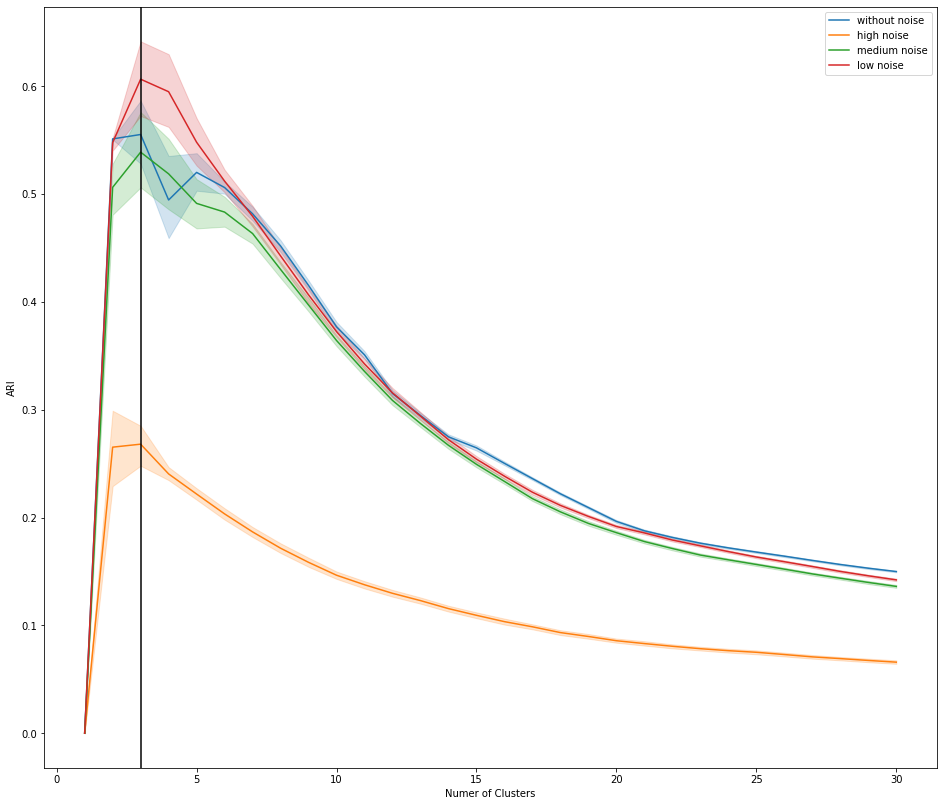

In [30]:
#combining all the plots for 3D data
Event=[]
for i in range(0,3000):
    Event.append('without noise')
for i in range(0,3000):
    Event.append('high noise')
for i in range(0,3000):
    Event.append('medium noise')
for i in range(0,3000):
    Event.append('low noise')
    
Total_ARI_3D=[]
Total_ARI_3D.extend(Rand_Index_3D)
Total_ARI_3D.extend(Rand_Index_3D_HighNoise)
Total_ARI_3D.extend(Rand_Index_3D_MediumNoise)
Total_ARI_3D.extend(Rand_Index_3D_LowNoise)

Total_Cluster_3D=[]
Total_Cluster_3D.extend(cluster)
Total_Cluster_3D.extend(cluster_HighNoise)
Total_Cluster_3D.extend(cluster_MediumNoise)
Total_Cluster_3D.extend(cluster_LowNoise)

data_3D={'Number of Clusters':Total_Cluster_3D,'ARI':Total_ARI_3D,'Event':Event}
plt.figure(figsize=(16, 14))
sns.lineplot(x='Number of Clusters',y='ARI',hue='Event',data=data_3D)
plt.xlabel('Numer of Clusters')
plt.axvline(x=3,color='k')
plt.ylabel('ARI')
maxid = np.argmax(Total_ARI_3D)